<a href="https://colab.research.google.com/github/LuciaSejas/weights_defect_detect/blob/main/Defect_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Defect Detection Software**

The following application detects automatically the quantity of defects on an optical image of a sample. The output will show the location of the defects and also the quantity of them.



First step: Run the cell below with the following symbol   runsimbol.png    

This cell is loading all of the necessary packages and libraries for the application to work properly

In [ ]:
!pip install ultralytics==8.0.134
from ultralytics import YOLO
import glob
from time import time
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from google.colab import files


!git clone https://github.com/LuciaSejas/weights_defect_detect.git


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.1/629.1 kB 5.1 MB/s eta 0:00:00
Cloning into 'weights_defect_detect'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 18.39 MiB | 25.01 MiB/s, done.


Second step: Run the next cell and a uploading promt is going to be shown. Next the detection process will go on and the output will be shown below the cell

Saving MON0234_2 pos04 obj10xCDIC100.jpg to MON0234_2 pos04 obj10xCDIC100 (4).jpg
/content/MON0234_2 pos04 obj10xCDIC100 (4).jpg



0: 480x640 6 Defects, 10.4ms
Speed: 3.1ms preprocess, 10.4ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)


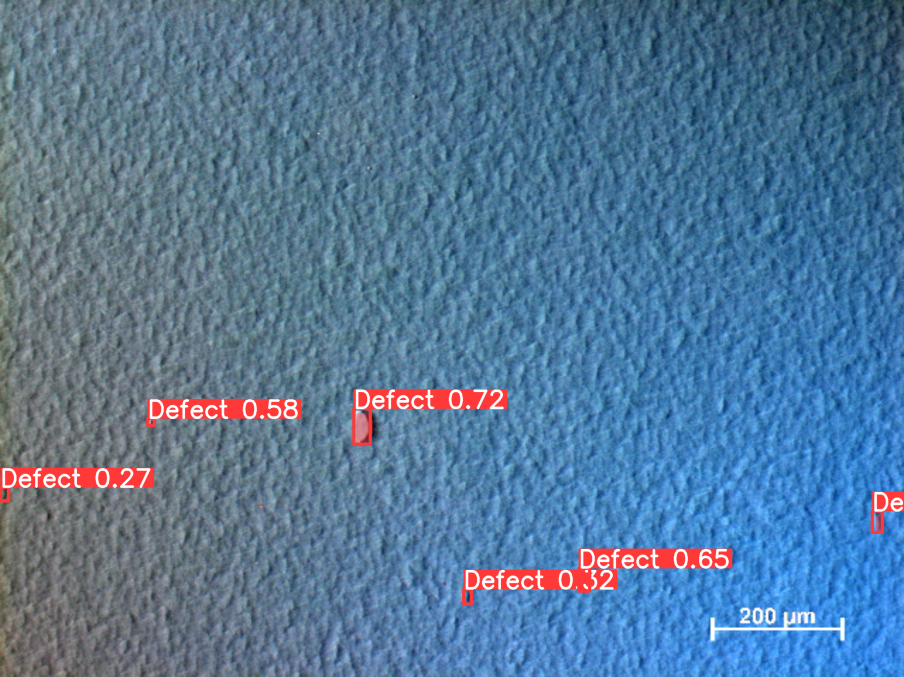

In [16]:
uploaded = files.upload()
fn = uploaded.keys()
for fn in uploaded.keys():
  path = '/content/' + fn

print(path)


model = YOLO("/content/weights_defect_detect/best_v9.pt")

for file in glob.glob(path):
    result = model(cv2.imread(file))
    res_plotted = result[0].plot()

    scale_percent = 35
    width = int(res_plotted.shape[1] * scale_percent / 100)
    height = int(res_plotted.shape[0] * scale_percent / 100)
    dim = (width, height)


    resized = cv2.resize(res_plotted, dim, interpolation = cv2.INTER_AREA)


    cv2_imshow(resized)
    cv2.waitKey(0)